# Introduction to PyTorch

This tutorial uses material from Prof. Yang You and Prof. Xavier Bresson.


In [ ]:
# frequently used import
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt

# fix the random number so that the experiments are reproducible
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

torch.__version__

'2.1.0+cu121'

## Part one: Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.


### Initializing a tensor`

Directly from data

Tensors can be created directly from data. The data type is automatically inferred.


In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


### Construct a vector of 3 elements

In [ ]:
x=torch.Tensor( [5.3 , 2.1 , -3.1 ] )
print(x)

tensor([ 5.3000,  2.1000, -3.1000])


### Construct a random 10 x 2 matrix

In [ ]:
A=torch.rand(10,2)
print(A)

tensor([[0.5263, 0.2437],
        [0.5846, 0.0332],
        [0.1387, 0.2422],
        [0.8155, 0.7932],
        [0.2783, 0.4820],
        [0.8198, 0.9971],
        [0.6984, 0.5675],
        [0.8352, 0.2056],
        [0.5932, 0.1123],
        [0.1535, 0.2417]])


### Construct a 10 x 2 matrix filled with zeros

In [ ]:
A=torch.zeros(10,2)
print(A)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


### Checking the dimension of a tensor

In [ ]:
A=torch.rand(3,2,4,8)
print(A)

tensor([[[[0.7262, 0.7011, 0.2038, 0.6511, 0.7745, 0.4369, 0.5191, 0.6159],
          [0.8102, 0.9801, 0.1147, 0.3168, 0.6965, 0.9143, 0.9351, 0.9412],
          [0.5995, 0.0652, 0.5460, 0.1872, 0.0340, 0.9442, 0.8802, 0.0012],
          [0.5936, 0.4158, 0.4177, 0.2711, 0.6923, 0.2038, 0.6833, 0.7529]],

         [[0.8579, 0.6870, 0.0051, 0.1757, 0.7497, 0.6047, 0.1100, 0.2121],
          [0.9704, 0.8369, 0.2820, 0.3742, 0.0237, 0.4910, 0.1235, 0.1143],
          [0.4725, 0.5751, 0.2952, 0.7967, 0.1957, 0.9537, 0.8426, 0.0784],
          [0.3756, 0.5226, 0.5730, 0.6186, 0.6962, 0.5300, 0.2560, 0.7366]]],


        [[[0.0204, 0.2036, 0.3748, 0.2564, 0.3251, 0.0902, 0.3936, 0.6069],
          [0.1743, 0.4743, 0.8579, 0.4486, 0.5139, 0.4569, 0.6012, 0.8179],
          [0.9736, 0.8175, 0.9747, 0.4638, 0.0508, 0.2630, 0.8405, 0.4968],
          [0.2515, 0.1168, 0.0321, 0.0780, 0.3986, 0.7742, 0.7703, 0.0178]],

         [[0.8119, 0.1087, 0.3943, 0.2973, 0.4037, 0.4018, 0.0513, 0.0683],
    

In [ ]:
print(A.dim())

4


In [ ]:
print(A.size())

torch.Size([3, 2, 4, 8])


In [ ]:
print(A.size(2))

4


In [ ]:
print(A.shape)

torch.Size([3, 2, 4, 8])


### Data Types of Tensors

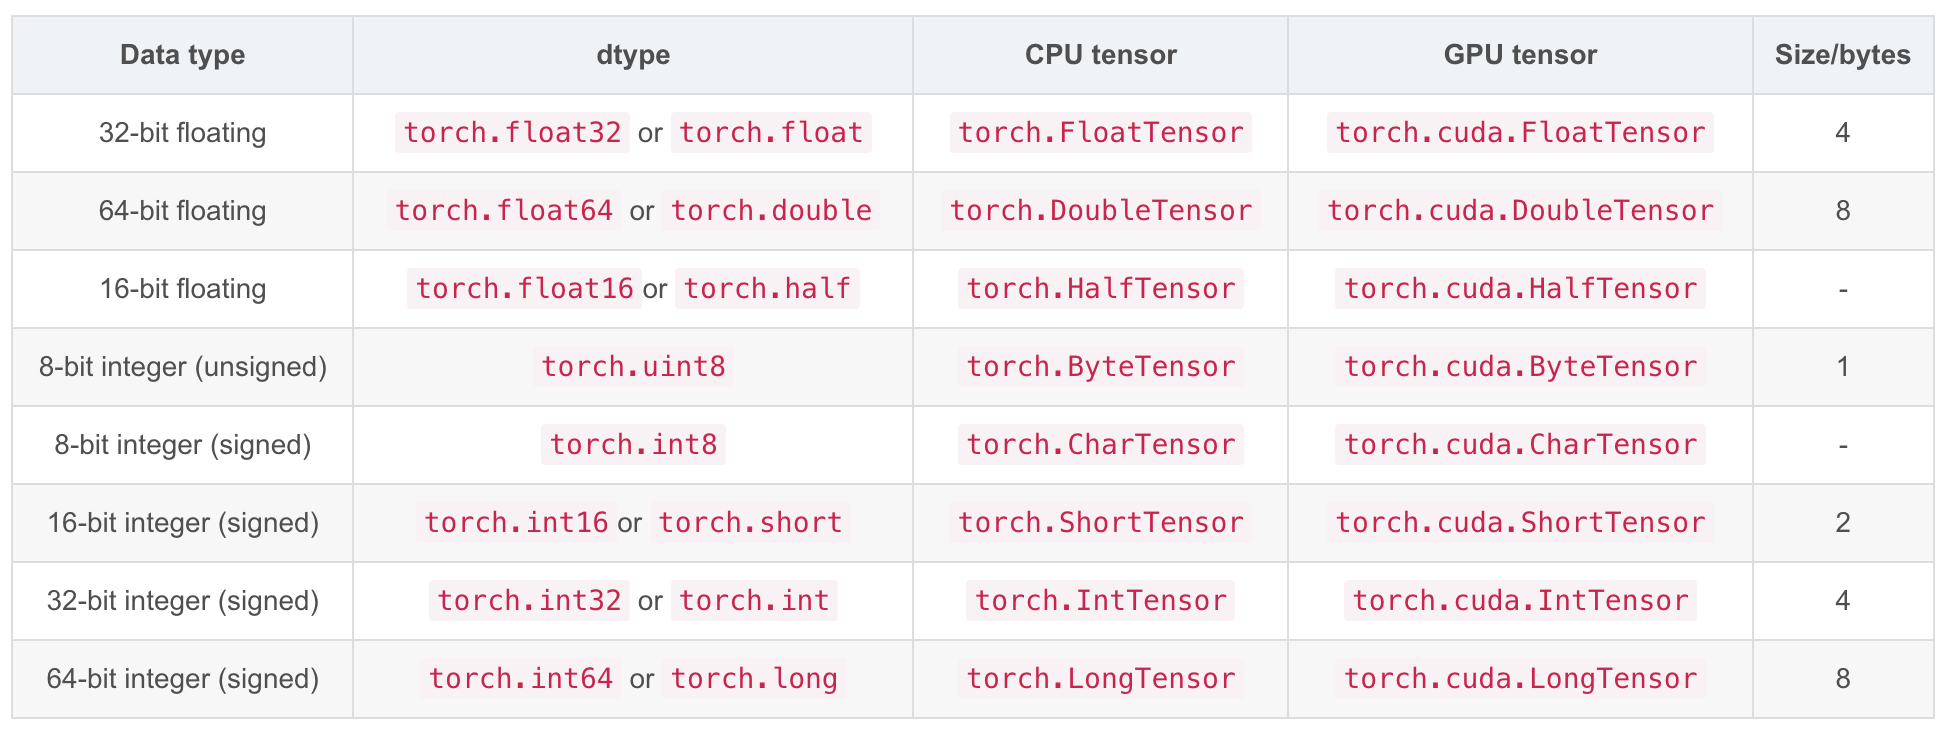

In [ ]:
print(torch.FloatTensor(2,3).type()) #float type
print(torch.DoubleTensor(2,3).type()) #double type
print(torch.HalfTensor (2,3).type()) #half type

torch.FloatTensor
torch.DoubleTensor
torch.HalfTensor


In [ ]:
tensor = torch.randn(2, 2)
print(tensor.type())

long_tensor = tensor.long()
print(long_tensor.type())

half_tensor = tensor.half()
print(half_tensor.type())

int_tensor = tensor.int()
print(int_tensor.type())

torch.FloatTensor
torch.LongTensor
torch.HalfTensor
torch.IntTensor


### Converting the tensors to cuda tensors

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.


In [ ]:
!nvidia-smi

Mon Jan 22 12:48:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Now we can convert out CPU tensors to CUDA tensors to accelerate the computation!

In [ ]:
x1 = torch.tensor(1.0) # tensor on CPU
x2 = torch.tensor(1.0, device="cuda:0") # tensor on GPU
x3 = torch.tensor(1.0, requires_grad=True).cuda() # tensor on GPU and require grad
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor(1.)
x2: tensor(1., device='cuda:0')
x3: tensor(1., device='cuda:0', grad_fn=<ToCopyBackward0>)


Most deep learning frameworks, including PyTorch, train with 32-bit floating point (FP32) arithmetic by default.
However this is not essential to achieve full accuracy for many deep learning models. In 2017, NVIDIA researchers developed a methodology for mixed-precision training, which combined single-precision (FP32) with half-precision (e.g. FP16) format when training a network, and achieved the same accuracy as FP32 training using the same hyperparameters, with additional performance benefits on NVIDIA GPUs:



*   Shorter training time;
*   Lower memory requirements, enabling larger batch sizes, larger models, or larger inputs.



NVIDIA developed Apex in 2018, which is a lightweight PyTorch extension with Automatic Mixed Precision (AMP) feature. This feature enables automatic conversion of certain GPU operations from FP32 precision to mixed precision, thus improving performance while maintaining accuracy.
For example, in PyTorch1.6, the following operations are converted to half-precision: \\
* addbmm \\
* addmm \\
* bmm \\
* conv1d \\
* conv2d \\
* conv3d \\
* conv_transpose1d \\
* conv_transpose2d \\
* conv_transpose3d \\
* linear \\
* matmul \\
......


### FP16 on NVIDIA V100 vs. FP32 on V100
AMP with FP16 is the most performant option for DL training on the V100. In Table 1, we can observe that for various models, AMP on V100 provides a speedup of 1.5x to 5.5x over FP32 on V100 while converging to the same final accuracy.


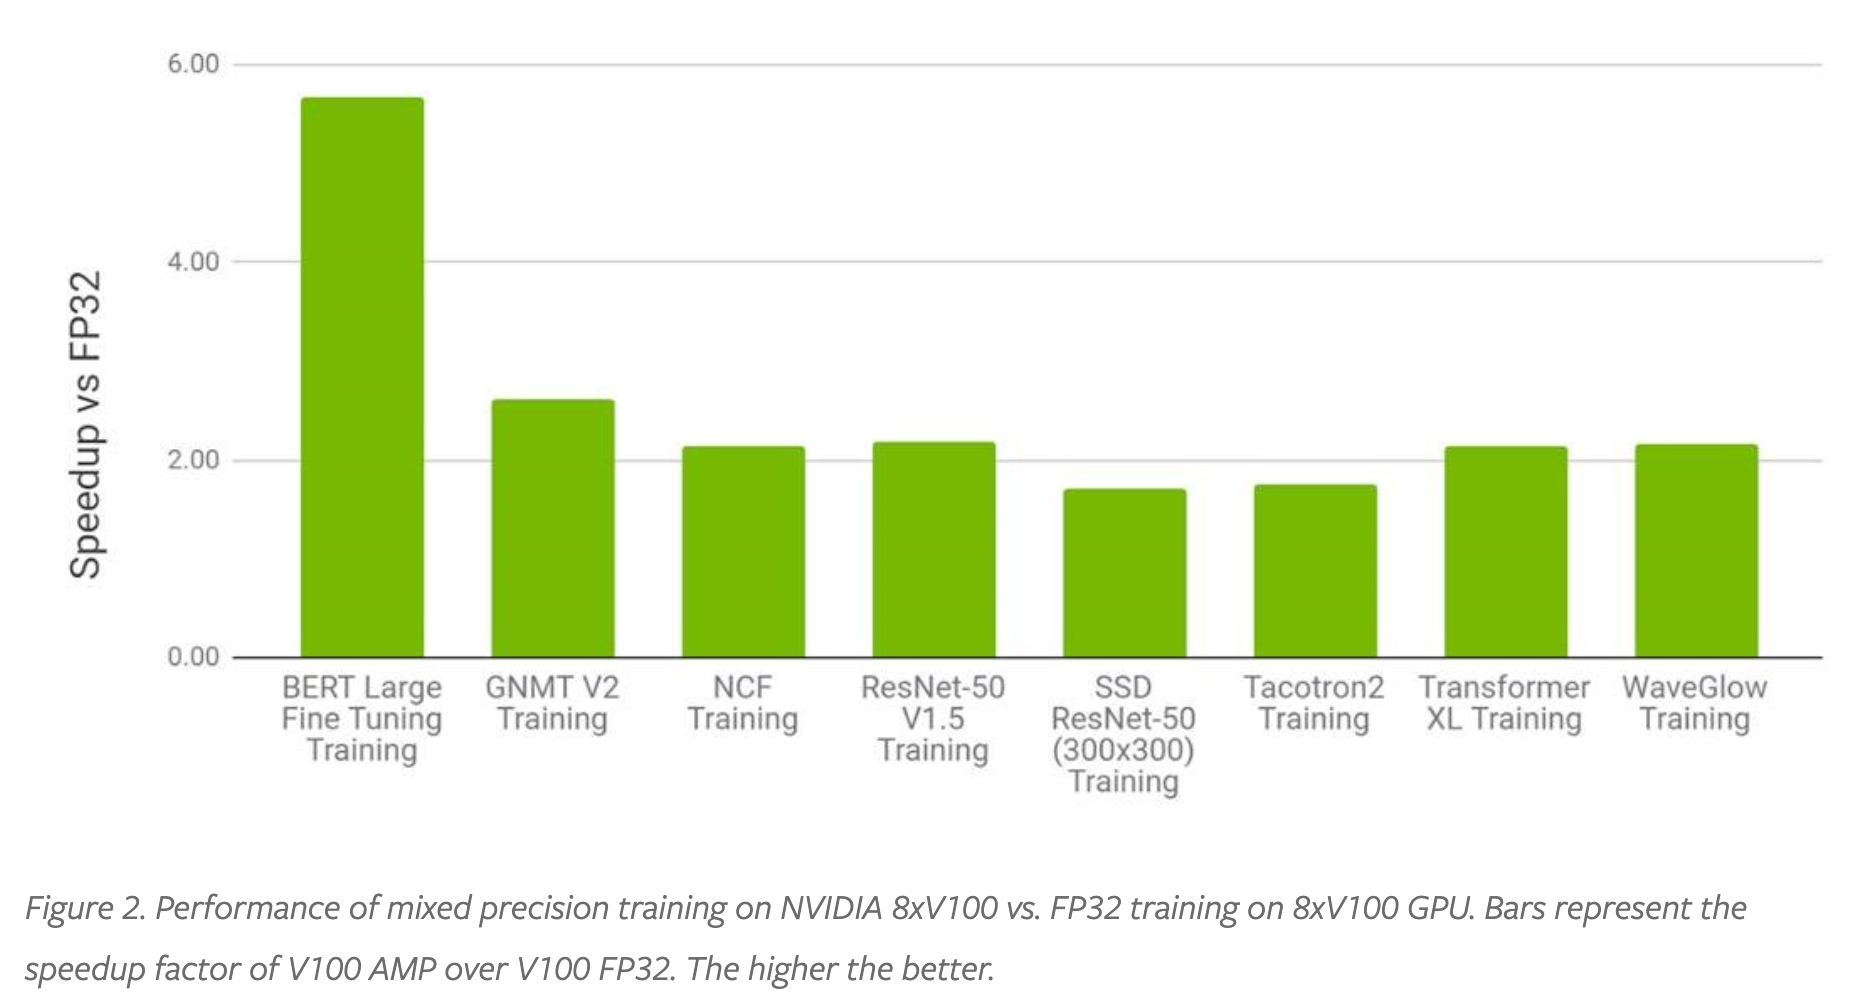

### Reshaping tensors
Returns a new tensor with the same data as the self tensor but of a different shape.

In [ ]:
x=torch.arange(10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
print( x.view(2,5) )

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [ ]:
print( x.view(5,2) )

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


### Note that the original tensor x was NOT modified

In [ ]:
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
y=x.view(5,2)

print(x)
print('')
print(y)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


###reshape
torch.reshape(input, shape) → Tensor
Returns a tensor with the same data and number of elements as input, but with the specified shape.

A single dimension may be -1, in which case it’s inferred from the remaining dimensions and the number of elements in input.

Parameters
input (Tensor) – the tensor to be reshaped

shape (tuple of int) – the new shape

In [ ]:
a = torch.arange(4.)
print(torch.reshape(a, (2, 2)))


b = torch.tensor([[0, 1], [2, 3]])
print(torch.reshape(b, (-1, 4)))

tensor([[0., 1.],
        [2., 3.]])
tensor([[0, 1, 2, 3]])


In [ ]:
a = torch.randn(1, 2, 3, 4)
print(a.size())

b = a.transpose(1, 2)  # Swaps 2nd and 3rd dimension
print(b.size())

c = a.view(1, 3, 2, 4)  # Does not change tensor layout in memory
print(c.size())



torch.Size([1, 2, 3, 4])
torch.Size([1, 3, 2, 4])
torch.Size([1, 3, 2, 4])


In [ ]:
print(torch.equal(b, c))

False


In [ ]:
print(a)
print(b)
print(c)

tensor([[[[ 0.5851, -1.1560, -0.1434, -0.1947],
          [ 1.4903, -0.7005,  0.1806,  1.3615],
          [-0.7205, -2.2148, -0.6837,  0.5164]],

         [[ 0.5588,  0.7918, -0.1847, -0.7318],
          [-1.1057,  0.1437,  0.5836,  1.3482],
          [-0.8137,  0.8200, -0.6332,  1.2948]]]])
tensor([[[[ 0.5851, -1.1560, -0.1434, -0.1947],
          [ 0.5588,  0.7918, -0.1847, -0.7318]],

         [[ 1.4903, -0.7005,  0.1806,  1.3615],
          [-1.1057,  0.1437,  0.5836,  1.3482]],

         [[-0.7205, -2.2148, -0.6837,  0.5164],
          [-0.8137,  0.8200, -0.6332,  1.2948]]]])
tensor([[[[ 0.5851, -1.1560, -0.1434, -0.1947],
          [ 1.4903, -0.7005,  0.1806,  1.3615]],

         [[-0.7205, -2.2148, -0.6837,  0.5164],
          [ 0.5588,  0.7918, -0.1847, -0.7318]],

         [[-1.1057,  0.1437,  0.5836,  1.3482],
          [-0.8137,  0.8200, -0.6332,  1.2948]]]])


## Defining your own network

### Creating a two-layer network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### In Pytorch, networks are defined as classes


In [ ]:
class two_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(two_layer_net , self).__init__()

        self.layer1 = nn.Linear( input_size, hidden_size , bias=True)
        self.layer2 = nn.Linear( hidden_size, output_size , bias=True)

    def forward(self, x):

        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        p = F.softmax(x, dim=0)

        return p

### Create an instance that takes input of size 2, then transform it into something of size 5, then into something of size 3
$$
\begin{bmatrix}
\times \\ \times
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
\times \\ \times \\ \times \\ \times \\ \times
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
\times \\ \times \\ \times
\end{bmatrix}
$$

In [ ]:
net= two_layer_net(2,5,3)
print(net)

two_layer_net(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=3, bias=True)
)


### Now we are going to make an input vector and feed it to the network:

In [ ]:
x=torch.Tensor([1,1])
print(x)

tensor([1., 1.])


In [ ]:
p=net.forward(x)
print(p)

tensor([0.2430, 0.2654, 0.4916], grad_fn=<SoftmaxBackward0>)


In [ ]:
p=net(x)
print(p)

tensor([0.2430, 0.2654, 0.4916], grad_fn=<SoftmaxBackward0>)


### We can access the first module as follow:

In [ ]:
print(net.layer1)

Linear(in_features=2, out_features=5, bias=True)


In [ ]:
print(net.layer1.weight)

Parameter containing:
tensor([[-0.3412,  0.1270],
        [-0.3673,  0.1629],
        [ 0.1389, -0.5250],
        [ 0.1177,  0.3012],
        [ 0.2799, -0.0890]], requires_grad=True)


In [ ]:
print(net.layer1.bias)

Parameter containing:
tensor([-0.5797, -0.1090,  0.2456, -0.2580,  0.2684], requires_grad=True)


In [ ]:
list_of_param = list( net.parameters() )
print(list_of_param)

[Parameter containing:
tensor([[-0.3412,  0.1270],
        [-0.3673,  0.1629],
        [ 0.1389, -0.5250],
        [ 0.1177,  0.3012],
        [ 0.2799, -0.0890]], requires_grad=True), Parameter containing:
tensor([-0.5797, -0.1090,  0.2456, -0.2580,  0.2684], requires_grad=True), Parameter containing:
tensor([[ 0.2978, -0.2335,  0.0044,  0.1849,  0.0351],
        [ 0.0374,  0.0558, -0.3516,  0.0351,  0.3097],
        [ 0.4030,  0.2629,  0.0599,  0.2089, -0.2176]], requires_grad=True), Parameter containing:
tensor([-0.3706, -0.3846,  0.4461], requires_grad=True)]
